<h1 style="text-align: center;">System Step Response Using Convolution</h1>
<p style="text-align: center;">Lab 4</p>
<p style="text-align: center;">Spring 2024</p>

### 1. Purpose 
Become familiar with using convolution to compute a system's step response.  

### 2. Deliverables Overview 
##### Part 1  
[ ] Plots for **Task 2**.  
  
##### Part 2
[ ] Plots for **Task 1**.  
[ ] Hand calculated convolution integrals from **Task 2**.  
[ ] Plots for **Task 2**.  

### 3. Part 1
##### 3.1 Purpose
Use the step function you coded previously to operate on given transfer functions.  
##### 3.2 Tasks
1. Create the following signals with user-defined functions.  
$$h_1(t) = e^{2t}u(1 - t)$$  
$$h_2(t) = u(t - 2) - u(t - 6)$$  
$$h_3(t) = \cos{(\omega_0 t)}u(t)$$ for, $f_0 = 0.25$ Hz.  

In [52]:
#Insert all necessary imports here

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

In [53]:
#Insert your step and convolution functions here

def step(t): # my step function
    """
    Signal u(t) creation
    Inputs: t - time vector
    Oututs: u - generated signal u(t)
    """ 
    u = np.zeros(t.shape)
    for i in range(len(t)):
        if t[i] < 0:
            u[i] = 0
        else:
            u[i] = 1
    return u

def ramp(t): # my ramp function
    """
    Signal r(t) creation
    Inputs: t - time vector
    Oututs: r - generated signal r(t)
    """ 
    r = np.zeros(t.shape)
    for i in range(len(t)):
        if t[i] < 0:
            r[i] = 0
        else:
            r[i] = t[i]
    return r

def convolve(f1, f2):
    """
    Convolution Function
    Inputs: f1 - func1, f2 - func2
    Oututs: result - array of y vals from convolution
    """ 
    
    len_f1 = len(f1)
    len_f2 = len(f2)
    f1_ext = np.append(f1, np.zeros((1, len_f2-1)))
    f2_ext = np.append(f2, np.zeros((1, len_f1-1)))
    result = np.zeros(f1_ext.shape)
    
    for i in range(len_f2 + len_f1 - 2):
        result[i] = 0
        for j in range(len_f1):
            result[i] += f1_ext[j] * f2_ext[i-j+1]
            
    return result

In [54]:
#Insert the code for the transfer functions here

def tran1(t):
    """
    Signal h1(t) creation
    Inputs: t - time vector
    Oututs: h - generated signal h1(t)
    """ 
    return np.exp(2*t)*step(1-t)

def tran2(t):
    """
    Signal h2(t) creation
    Inputs: t - time vector
    Oututs: h - generated signal h2(t)
    """ 
    return step(t-2)-step(t-6)

def tran3(t):
    """
    Signal h3(t) creation
    Inputs: t - time vector
    Oututs: h - generated signal h3(t)
    """ 
    f0 = 0.25
    return np.cos(2*np.pi*f0*t)*step(t)

2. Plot the three functions in a single figure (separate subplots) from $-10 \le t \le 10$ with time steps small enough to achieve appropriate resolution. 

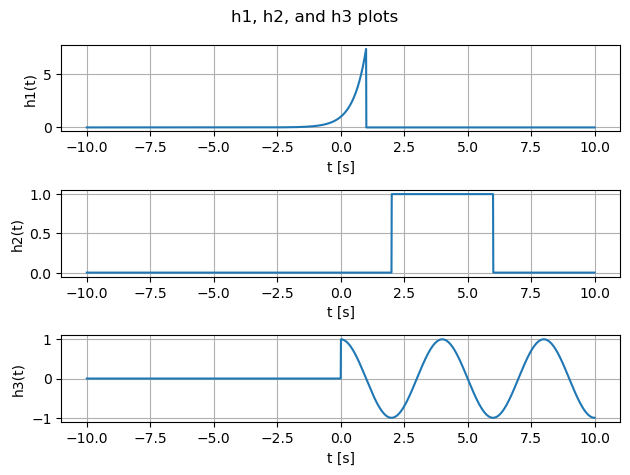

In [55]:
#Insert code calling and plotting the transfer functions in one figure with three subplots here

steps = 1e-2
t = np.arange(-10, 10 + steps, steps)
y = tran1(t)

plt.figure()
plt.suptitle("h1, h2, and h3 plots")

plt.subplot(3, 1, 1)
plt.plot(t, y)
plt.grid()
plt.ylabel("h1(t)")
plt.xlabel("t [s]")

t = np.arange(-10, 10 + steps, steps)
y = tran2(t)

plt.subplot(3, 1, 2)
plt.plot(t, y)
plt.grid()
plt.ylabel("h2(t)")
plt.xlabel("t [s]")

t = np.arange(-10, 10 + steps, steps)
y = tran3(t)

plt.subplot(3, 1, 3)
plt.plot(t, y)
plt.grid()
plt.ylabel("h3(t)")
plt.xlabel("t [s]")

plt.tight_layout()
plt.show()

### 4. Part 2
##### 4.1 Purpose
Find and plot the step response of the three transfer functions defined in **Part 1** using Python and hand calculations.
##### 4.2 Tasks
Perform the following tasks for each of the three transfer functions defined in **Part 1**. Plot each response from $-10 \le t \le 10$ with an appropriate step size.  
1. Plot the step response using your convolution and step functions created earlier.

In [56]:
#Insert code performing the step response for all three transfer functions here

steps = 1e-2
t = np.arange(-10, 10 + steps, steps)
t_conv = np.arange(2*t[0],2*t[len(t)-1]+steps, steps)

conv_tran1 = convolve(tran1(t), step(t))*steps
conv_tran2 = convolve(tran2(t), step(t))*steps
conv_tran3 = convolve(tran3(t), step(t))*steps

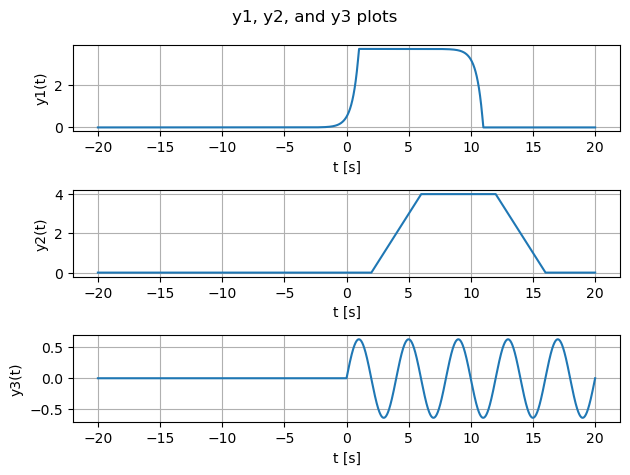

In [57]:
#Insert code plotting all three step responses in one figure with three subplots here

plt.figure()
plt.suptitle("y1, y2, and y3 plots")

plt.subplot(3, 1, 1)
plt.plot(t_conv, conv_tran1)
plt.grid()
plt.ylabel("y1(t)")
plt.xlabel("t [s]")

plt.subplot(3, 1, 2)
plt.plot(t_conv, conv_tran2)
plt.grid()
plt.ylabel("y2(t)")
plt.xlabel("t [s]")

plt.subplot(3, 1, 3)
plt.plot(t_conv, conv_tran3)
plt.grid()
plt.ylabel("y3(t)")
plt.xlabel("t [s]")

plt.tight_layout()
plt.show()

2. By hand, calculate the step response of each transfer function by solving the convolution integral. Plot the results and ensure they match the plots from **Task 1**. *Note: Recall for this class all math must be done symbolically not numerically.*

>Insert your hand calculated integrals here. Show all necessary work and write them using LaTeX math mode.  

$$
y_1(t) = e^{2t}u(1-t) * u(t) = \int_{-\infty}^{\infty} e^{2\tau}d\tau = \frac{1}{2}e^{2t}u(1-t)-\frac{1}{2}e^2u(1-t)+\frac{1}{2}e^2 = \frac{1}{2}(e^{2t}-e^{2})u(1-t)+\frac{1}{2}e^2
$$
$$
y_2(t) =$ u(t-2)-u(t-6) * u(t) = \int_{-\infty}^{\infty} u(\tau-2)-u(\tau-6)d\tau = r(t-2)-r(t-6)
$$
$$
y_3(t) = cos(\omega_0𝑡)𝑢(𝑡) * u(t) = \int_{-\infty}^{\infty} cos(\omega_0\tau)d\tau = \frac{1}{\omega_0}sin(\omega_0t)u(t)
$$

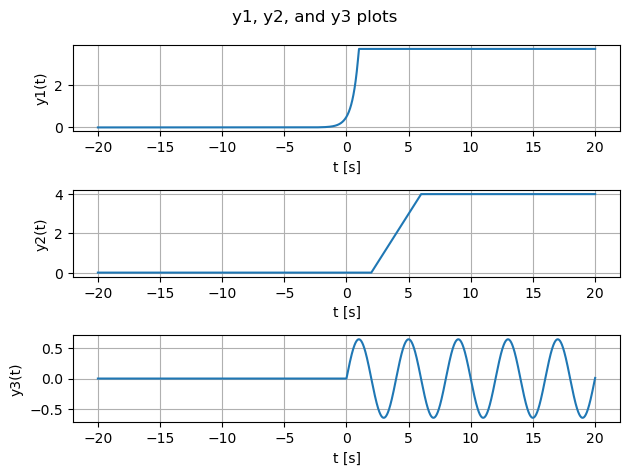

In [171]:
#Insert code plotting your hand calculated step responses in one figure with three subplots here. 
#Note: These won't look exactly like the plots from earlier because a computer has no concept of infinity

def y1(t):
    """
    Signal y1(t) creation
    Inputs: t - time vector
    Oututs: y - generated signal y1(t)
    """ 
    return (1/2)*((np.exp(2*t)-np.exp(2))*step(1-t)+np.exp(2))

def y2(t):
    """
    Signal y2(t) creation
    Inputs: t - time vector
    Oututs: y - generated signal y2(t)
    """ 
    return ramp(t-2)-ramp(t-6)

def y3(t):
    """
    Signal y3(t) creation
    Inputs: t - time vector
    Oututs: y - generated signal y3(t)
    """ 
    f0 = 0.25
    return (1/(2*np.pi*f0))*np.sin(2*np.pi*f0*t)*step(t)

steps = 1e-2
t = np.arange(-20, 20 + steps, steps)

plt.figure()
plt.suptitle("y1, y2, and y3 plots")

y = y1(t)

plt.subplot(3, 1, 1)
plt.plot(t,y)
plt.grid()
plt.ylabel("y1(t)")
plt.xlabel("t [s]")

y = y2(t)

plt.subplot(3, 1, 2)
plt.plot(t,y)
plt.grid()
plt.ylabel("y2(t)")
plt.xlabel("t [s]")

y = y3(t)

plt.subplot(3, 1, 3)
plt.plot(t,y)
plt.grid()
plt.ylabel("y3(t)")
plt.xlabel("t [s]")

plt.tight_layout()
plt.show()

### 5. Questions
1. Leave any feedback on the clarity of lab tasks, expectations, and deliverables.  
>Replace this text with your answer, but leave the ">" symbol.